<center><h1>Retrieving the Pascal VOC Dataset</h1>
<h2>Matthias Bartolo</h2>

</center>

**<h3> Cloning Dataset </h3>**

In [1]:
do_clone = False
download = True
year = "2012" #"2007"
path = 'PascalVOC2012Dataset'

In [2]:
if do_clone:
    import torchvision 
    from torchvision import datasets
    import os

    # Downloading the pascal_voc dataset from torchvision
    if download:
        train_dataset = datasets.VOCDetection(root=os.path.join(path, 'train'), year=year, image_set='train', download=True)
        test_dataset = datasets.VOCDetection(root=os.path.join(path, 'test'), year=year, image_set='val', download=True)
    else:
        train_dataset = datasets.VOCDetection(root=os.path.join(path, 'train'), year=year, image_set='train', download=False)
        test_dataset = datasets.VOCDetection(root=os.path.join(path, 'test'), year=year, image_set='val', download=False)

**<h3> Displaying Images </h3>**

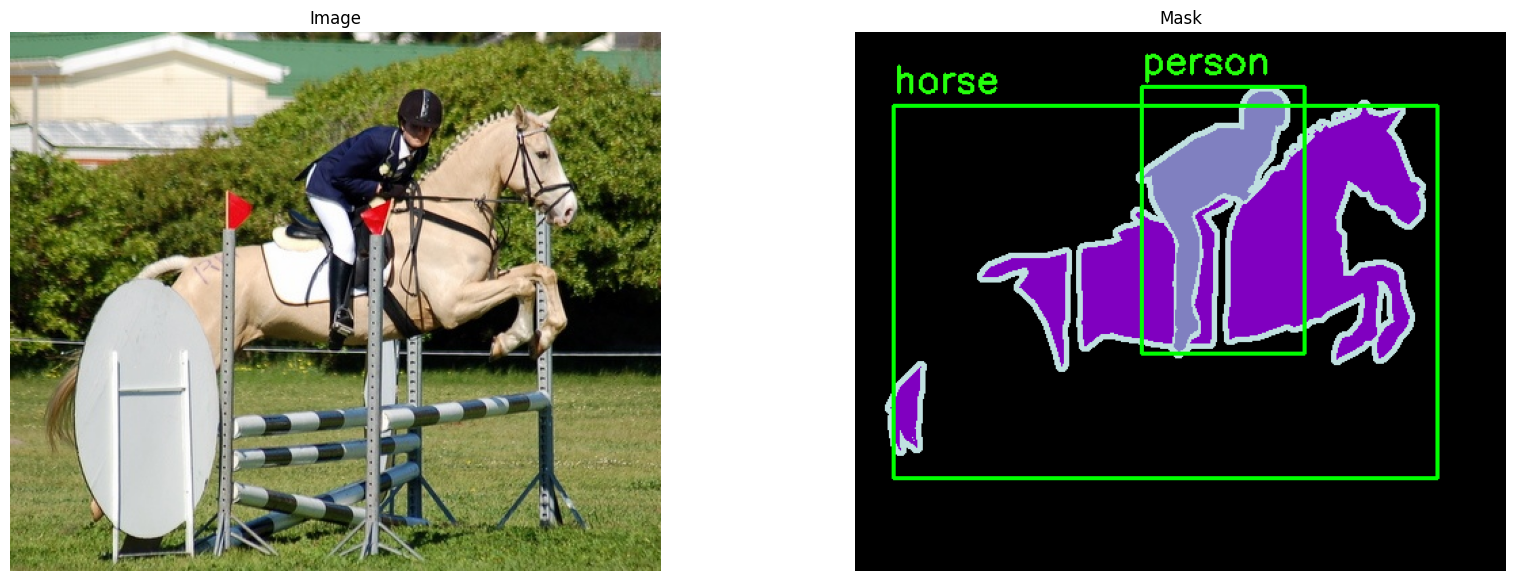

In [3]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Relative path to the images and masks directories
img_dir = os.path.join(path, 'train\\VOCdevkit\\VOC2012\\JPEGImages')
mask_dir = os.path.join(path, 'train\\VOCdevkit\\VOC2012\\SegmentationClass')
annotation_dir = os.path.join(path, 'train\\VOCdevkit\\VOC2012\\Annotations')

# Retrieving a list of filenames in the directories
img_filenames = os.listdir(img_dir)
mask_filenames = os.listdir(mask_dir)
annotation_filenames = os.listdir(annotation_dir)

# Setting the image number to be displayed
img_number =100

# Selecting the first filename from the lists
img_filename = img_filenames[img_number]
mask_filename = img_filename.split(".")[0] + ".png"
annotation_filename = img_filename.split(".")[0] + ".xml"

# Constructing the full paths to the first image and mask
img_path = os.path.join(img_dir, img_filename)
mask_path = os.path.join(mask_dir, mask_filename)
annotation_path = os.path.join(annotation_dir, annotation_filename)

# Reading the image and mask
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

# Opening the annotation file from the xml file to get the bounding box and class
import xml.etree.ElementTree as ET
tree = ET.parse(annotation_path)
root = tree.getroot()

# Getting the bounding box and class
for obj in root.iter('object'):
    for box in obj.findall('bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
    for name in obj.findall('name'):
        class_name = name.text

    # Drawing the bounding box and class name on the mask
    cv2.rectangle(mask, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(mask, class_name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    

# Converting the mask to grayscale and image to RGB
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting image and mask
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].imshow(img)
ax[0].set_title("Image")
ax[0].axis("off")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")
plt.show()